<a href="https://colab.research.google.com/github/xvh422/L4-Project/blob/main/Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install eagleSqlTools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import eagleSqlTools as sql
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import gridspec

con = sql.connect("vwg533", password = "FZtn087h")

In [81]:
sim_name = 'RefL0100N1504'
sim_size = 100.

Query_IDs = "SELECT \
              SH.GalaxyID as id \
            FROM \
              %s_SubHalo as SH, \
              %s_Aperture as AP \
            WHERE \
              SH.SnapNum = 14 and \
              SH.SubGroupNumber = 0 and \
              AP.Mass_Star > 1.0e9 and \
              SH.MassType_BH > 2.5e8 and \
              AP.ApertureSize = 30 and \
              SH.GalaxyID = AP.GalaxyID"%(sim_name, sim_name)

Data_IDs = sql.execute_query(con, Query_IDs)

In [82]:
print(len(Data_IDs['id']))

43


In [83]:
sim_name = 'RefL0100N1504'
sim_size = 100.
# [21573586, 21379523, 21730540, 13259036, 21109774] For snapnums 28, 26, 23, 19, 14 ==> z = 0, 2.29, 5.19, 7.93, 10.86
galaxy_ids = Data_IDs['id']
zs = []
bhs = []

for i in range(len(galaxy_ids)):
  Query = "SELECT \
              gal.Redshift as z, \
              gal.MassType_BH as bh \
            FROM \
              %s_Subhalo as gal, \
              %s_Subhalo as ref \
            WHERE \
              ref.GalaxyID=%s and \
              ((gal.SnapNum > ref.SnapNum and ref.GalaxyID \
              between gal.GalaxyID and gal.TopLeafID) or \
              (gal.SnapNum <= ref.SnapNum and gal.GalaxyID \
              between ref.GalaxyID and ref.TopLeafID)) \
            ORDER BY \
              gal.Redshift"%(sim_name, sim_name, galaxy_ids[i])

  Data = sql.execute_query(con, Query)
  zs.append(Data['z'])
  bhs.append(Data['bh'])

In [ ]:
for i in range(len(zs)):
  print(len(zs[0]))

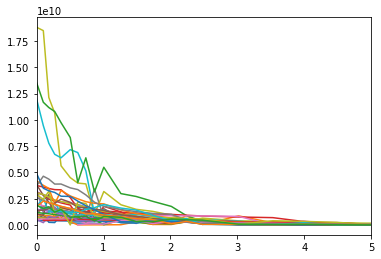

In [84]:
plt.figure()

for i in range(len(bhs)):
  plt.plot(zs[i], bhs[i])

plt.xlim(0,5)
#plt.ylim(1e10, 1.25e10)
plt.show()

In [86]:
for i in range(len(bhs)):
  print(galaxy_ids[i])
  print(bhs[i][0]/1e10)
  print('')

15274019
0.0284940512

19556677
0.0957732928

14593767
0.0719777152

22005747
0.0417719552

19215061
0.348190848

9578518
0.0731523776

21436445
0.041779056

21483442
0.0577417472

21379535
1.8822572032

21730549
1.1993590784

20595205
0.0454233472

20640575
0.0959005568

21109774
1.3545626624

18645000
0.3138561536

18680989
0.3076321536

15751392
0.1044872448

19076580
0.2079582464

19104586
0.1105098112

14407374
0.0696435392

18781603
0.178388416

15457933
0.0438828256

19669892
0.02977856

20877630
0.0480568032

20943546
0.3756393472

16807951
0.0499983104

20532208
0.3835138048

18292466
0.0543218944

18816278
0.2593699584

18893267
0.3042075136

19419636
0.1912064384

20967937
0.055934112

21059576
0.419326464

20324230
0.1191752064

19908047
0.043472352

19402369
0.1487117952

14916093
0.1368790016

14935254
0.000362526725

18481128
0.3714686208

18544442
0.2891602432

21834537
0.12650496

20099639
0.4900768256

18927216
0.173726144

18961520
0.1867010304

